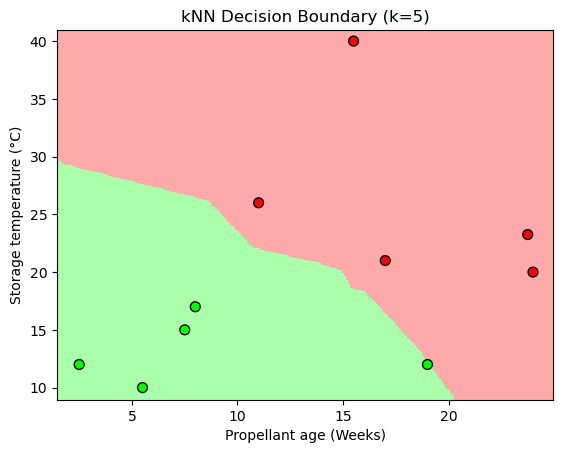

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Data Preparation [Propellant Age, Storage Temperature, Pass/Fail]
data = np.array([[15.5, 40, 0], [23.75, 23.25, 0], [8, 17, 1], [17, 21, 0], [5.5, 10, 1], 
                 [19, 12, 1], [24, 20, 0], [2.5, 12, 1], [7.5, 15, 1], [11, 26, 0]])
X = data[:, :2]
y = data[:, 2]

# kNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=50, edgecolor='k')
plt.xlabel('Propellant age (Weeks)')
plt.ylabel('Storage temperature (°C)')
plt.title('kNN Decision Boundary (k=5)')
plt.show()

In [2]:
from sklearn.model_selection import LeaveOneOut

# Validation Procedure (LOOCV)
loo = LeaveOneOut()
errors = []
    
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
        
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
        
    errors.append(y_pred != y_test)
    
loo_error_rate = np.mean(errors)
print(f"LOOCV Error Rate for k={k}: {loo_error_rate:.2f}")

LOOCV Error Rate for k=5: 0.10


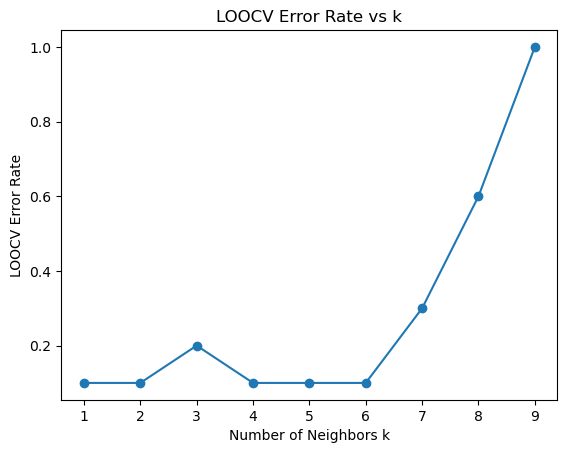

Optimal k: 1


In [3]:
# Optimal k Selection
k_values = range(1, len(X))
loo_errors = []

for l in k_values:
    knn = KNeighborsClassifier(n_neighbors=l)
    error_s = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        error_s.append(y_pred != y_test)
    
    loo_errors.append(np.mean(error_s))

plt.plot(k_values, loo_errors, marker='o')
plt.xlabel('Number of Neighbors k')
plt.ylabel('LOOCV Error Rate')
plt.title('LOOCV Error Rate vs k')
plt.show()

optimal_k = k_values[np.argmin(loo_errors)]
print(f"Optimal k: {optimal_k}")